In [10]:
# Notebook para probar los algoritmos para mejorar el contraste y las métricas
# Importar las librerías necesarias
import os
from ImagePreprocessing.utils import *
from ImagePreprocessing.contrast_enhancement import *
from EvaluationMetrics.evaluationMetrics import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Función para medir la métrica contrast Improvement ratio (CIR) en imágenes en escala de grises
def CIR(original_image, enhanced_image):
    """
    Función que calcula el índice de mejora de contraste (CIR) entre dos imágenes en escala de grises.

    Parámetros:
    original_image: Imagen original en escala de grises.
    enhanced_image: Imagen mejorada en escala de grises.

    Retorna:
    CIR: Valor del índice de mejora de contraste.
    """
    # Calcular el tamaño de la imagen
    M, N = original_image.shape

    # Inicializar las sumas para el numerador y el denominador
    numerator_sum = 0
    denominator_sum = 0

    # Calcular el CIR
    for u in range(1, M-1):
        for v in range(1, N-1):
            # Calcular la media de los vecinos para la imagen original y la mejorada
            mean_original = np.mean(original_image[u-1:u+2, v-1:v+2])
            mean_enhanced = np.mean(enhanced_image[u-1:u+2, v-1:v+2])

            # Calcular el contraste local para la imagen original
            denominator_original = original_image[u, v] + mean_original
            w_original = abs(original_image[u, v] - mean_original) / denominator_original if denominator_original != 0 else 0
            
            # Calcular el contraste local para la imagen mejorada
            denominator_enhanced = enhanced_image[u, v] + mean_enhanced
            w_enhanced = abs(enhanced_image[u, v] - mean_enhanced) / denominator_enhanced if denominator_enhanced != 0 else 0

            # Actualizar las sumas para el numerador y el denominador
            numerator_sum += (w_original - w_enhanced)**2
            denominator_sum += w_original**2

    # Calcular el CIR
    CIR = numerator_sum / denominator_sum if denominator_sum != 0 else 0

    return CIR

In [3]:
# Ruta de las imágenes
image_path = "E:/Panel_30W/P13/V24.2_I2.50_t30/JPEG_8"
background_path ="E:/Panel_30W/P13/V24.2_I2.50_t30/fondo_8/JPEG_fondo_8"
No_background_path = "E:/Panel_30W/Salida13/P8/dataset_noBG"
imagePP_path = "E:/Panel_30W/Salida13/P8bg"
image1_2Isc_path = "E:/Panel_30W/P13/V22.1_I0.9_t27.973/JPEG"
salidas_path = "D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/ImagePreprocessing/Salidas/TestContraste"


datasetEL = read_images(image_path)
datasetBG = read_images(background_path)
#dataset_noBG = read_images(No_background_path)
#datasetPP = read_images(imagePP_path)

# Imprime el número de imágenes en cada dataset
# para probar que las imágenes se agregaron
print("Imágenes en el dataset EL: ", len(datasetEL))
print("Imágenes en el dataset BG: ", len(datasetBG))
#print("Imágenes en el dataset noBG: ", len(dataset_noBG))
#print("Imágenes en el dataset PP: ", len(datasetPP))

Imágenes en el dataset EL:  51
Imágenes en el dataset BG:  51


Métricas para medir la mejora en el contraste de las imágenes:  

* contrast_metric
* CIR
* PL = psnr / blur

Algoritmos para mejorar el contraste de una imagen EL:

* MMC (Mejora de Contraste por Morfología de Contraste Máximo)
* CLAHE (Mejora de Contraste Adaptativo basado en Histogramas Limitados)
* HE (Ecualización de Histograma)

Se cuenta con el dataset de imágenes EL originales `datasetEL`, la idea es aplicar cada algoritmo a todas las imágenes del dataset y crear nuevos dataset para cada algoritmo, luego obtener las métricas de cada algoritmo y anotar los resultados en hojas de cálcuo tipo SCV para su posterior análisis y graficación

Para analizar los resultados de comparar distintas métricas para evaluar la mejora en el contraste de las imágenes EL, y también para comparar diferentes algoritmos de mejora de contraste, puedes seguir estos pasos:

1. **Aplicación de algoritmos de mejora de contraste:**
   - Implementa los algoritmos MMC, CLAHE y HE para mejorar el contraste de las imágenes del dataset `datasetEL`. Puedes utilizar bibliotecas como OpenCV para implementar estos algoritmos.

2. **Creación de nuevos datasets para cada algoritmo:**
   - Aplica cada algoritmo a todas las imágenes del dataset `datasetEL` y guarda las imágenes resultantes en nuevos datasets separados para cada algoritmo.

3. **Cálculo de métricas:**
   - Para cada imagen en cada nuevo dataset, calcula las métricas `contrast_metric`, CIR y PL según se describe. Puedes implementar funciones para calcular estas métricas o utilizar bibliotecas existentes si están disponibles.

4. **Anotación de resultados en hojas de cálculo CSV:**
   - Crea hojas de cálculo CSV para cada métrica y algoritmo, donde cada fila represente una imagen y cada columna represente el valor de la métrica calculada para esa imagen.

5. **Análisis y graficación:**
   - Utiliza bibliotecas como Pandas y Matplotlib para cargar los datos de las hojas de cálculo CSV, realizar análisis estadísticos y crear visualizaciones como gráficos de barras o diagramas de caja para comparar las métricas entre algoritmos y evaluar la efectividad de cada algoritmo en la mejora del contraste de las imágenes.


Contraste promedio en imágenes de datasetMMC:  93.28032189106243
Contraste promedio en imágenes de datasetEL:  49.1287973522965
CIRC promedio en imágenes de datasetMMC:  0.6121430080163657
PL promedio en imágenes de datasetMMC:  86.01524085198972


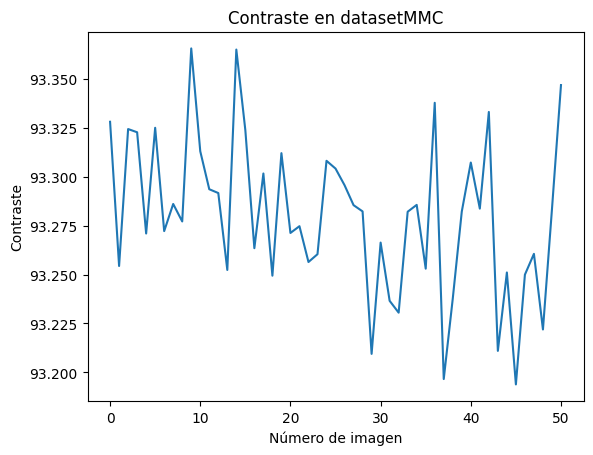

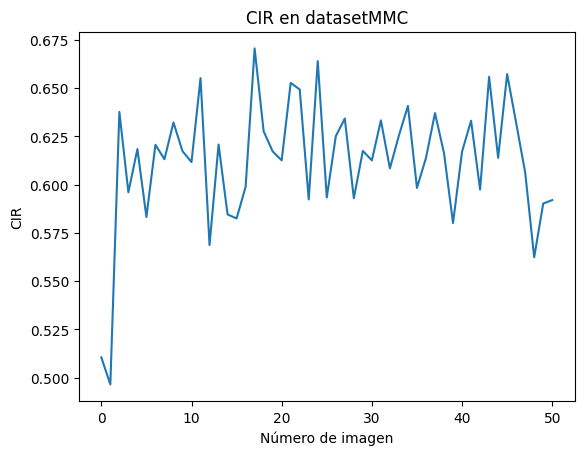

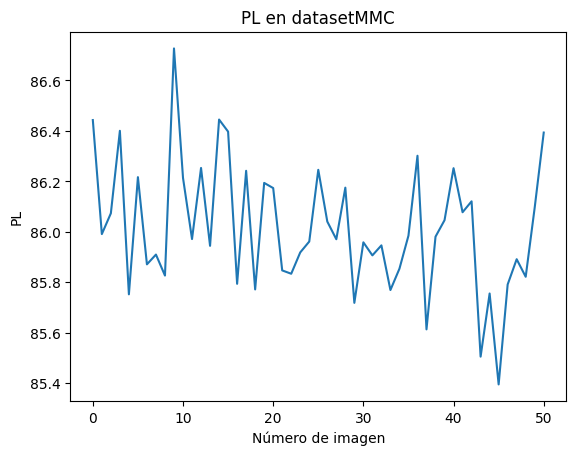

In [80]:
## Aplicación del algoritmo MMC
# datasetMMC = []
# for image in datasetEL:
#     datasetMMC.append(MMC(image, 7))

MMC_path = "D:/Documentos/Universidad de Cuenca/Trabajo de Titulación/PVDefectDetect/ImagePreprocessing/Salidas/TestContraste/datasetMMC"
datasetMMC = read_images(MMC_path)

## Creación de un dataset con las imágenes mejoradas, que se almacena en el directorio `salidas_path/datasetMMC`
# os.makedirs(os.path.join(salidas_path, "datasetMMC"), exist_ok=True)
# for i, image in enumerate(datasetMMC):
#     cv2.imwrite(os.path.join(salidas_path, "datasetMMC", f"MMC_{i}.jpg"), image)

## Cálculo de métricas en el datasetMMC
contrast_valuesMMC = []
for image in datasetMMC:
    contrast_valuesMMC.append(contrast_metric(image))
print("Contraste promedio en imágenes de datasetMMC: ", np.mean(contrast_valuesMMC))

contrast_valuesEL = [] # Cálculo de la métrica de contraste en datasetEL
for image in datasetEL:
    contrast_valuesEL.append(contrast_metric(image))
print("Contraste promedio en imágenes de datasetEL: ", np.mean(contrast_valuesEL))

CIR_valuesMMC = [] # Cálculo de la métrica CIR, requiere comparar cada imagen de datasetMMC con su correspondiente en datasetMMC
for imageMMC, imageEL in zip(datasetMMC, datasetEL):
    # imprime el número imagen que se está comparando
    print("Imagen: ", imageMMC)
    CIR_valuesMMC.append(CIR(imageEL, imageMMC))
print("CIRC promedio en imágenes de datasetMMC: ", np.mean(CIR_valuesMMC))

PL_valuesMMC = [] # Cálculo de la métrica PL, requiere comparar cada imagen de datasetEL con su correspondiente en datasetMMC
for imageMMC, imageEL in zip(datasetMMC, datasetEL):
    PL_valuesMMC.append(PL(imageEL, imageMMC))
print("PL promedio en imágenes de datasetMMC: ", np.mean(PL_valuesMMC))

## Anotación de los resultados en archivo SCV
df = pd.DataFrame({
    "Contraste EL": contrast_valuesEL,
    "Contraste MMC": contrast_valuesMMC,
    "CIR MMC": CIR_valuesMMC,
    "PL MMC": PL_valuesMMC
})
df.to_csv(salidas_path + "/metricsMMC.csv", index=False)



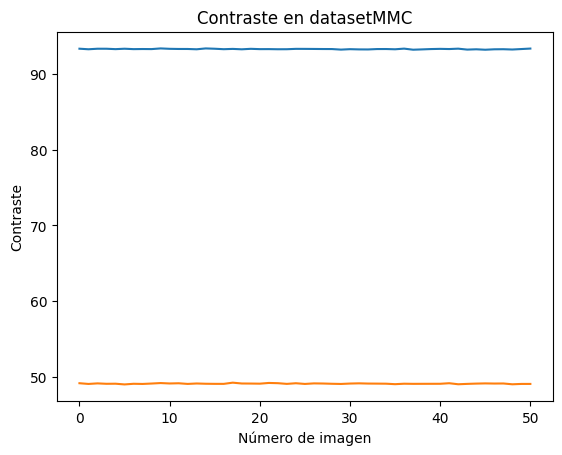

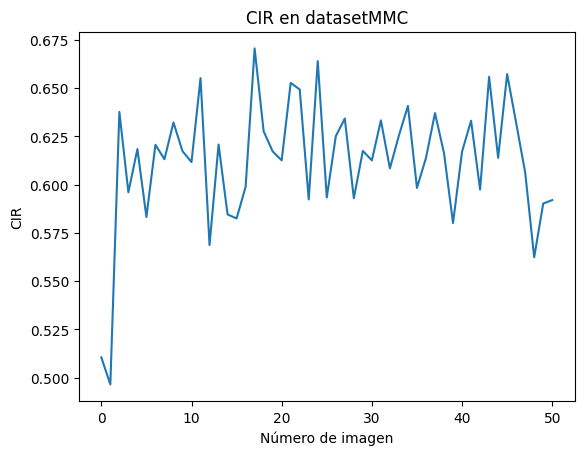

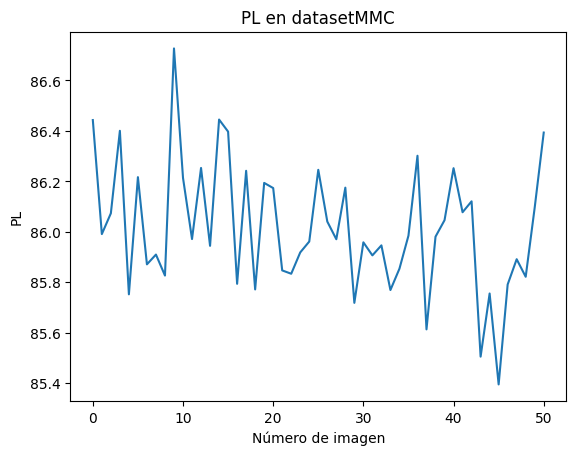

In [81]:
## Análisis y visualización de los resultados
plt.plot(contrast_valuesMMC, label="MMC")
plt.plot(contrast_valuesEL, label="Originales")
plt.title("Contraste en datasetMMC y datasetEL")
plt.xlabel("Número de imagen")
plt.ylabel("Contraste")
plt.show()

plt.plot(CIR_valuesMMC)
plt.title("CIR en datasetMMC")
plt.xlabel("Número de imagen")
plt.ylabel("CIR")
plt.show()

plt.plot(PL_valuesMMC)
plt.title("PL en datasetMMC")
plt.xlabel("Número de imagen")
plt.ylabel("PL")
plt.show()

In [83]:
## Aplicación del algoritmo CLAHE
datasetCLAHE = []
for image in datasetEL:
    datasetCLAHE.append(CLAHE(image, 2, (8,8)))

## Creación de un dataset con las imágenes mejoradas, que se almacena en el directorio `salidas_path/datasetCLAHE`
os.makedirs(os.path.join(salidas_path, "datasetCLAHE"), exist_ok=True)
for i, image in enumerate(datasetCLAHE):
    cv2.imwrite(os.path.join(salidas_path, "datasetCLAHE", f"CLAHE_{i}.jpg"), image)



In [ ]:
## Cálculo de métricas en el datasetCLAHE
contrast_valuesCLAHE = []
for image in datasetCLAHE:
    contrast_valuesCLAHE.append(contrast_metric(image))
print("Contraste promedio en imágenes de datasetCLAHE: ", np.mean(contrast_valuesCLAHE))

PL_valuesCLAHE = [] # Cálculo de la métrica PL, requiere comparar cada imagen de datasetEL con su correspondiente en datasetCLAHE
for imageCLAHE, imageEL in zip(datasetCLAHE, datasetEL):
    PL_valuesCLAHE.append(PL(imageEL, imageCLAHE))
print("PL promedio en imágenes de datasetCLAHE: ", np.mean(PL_valuesCLAHE))

CIR_valuesCLAHE = [] # Cálculo de la métrica CIR, requiere comparar cada imagen de datasetCLAHE con su correspondiente en datasetEL
for imageCLAHE, imageEL in zip(datasetCLAHE, datasetEL):
    # Imprime el número de imagen que se está comparando
    print("Imagen: ", imageCLAHE)
    CIR_valuesCLAHE.append(CIR(imageEL, imageCLAHE))
print("CIR promedio en imágenes de datasetCLAHE: ", np.mean(CIR_valuesCLAHE))

## Anotación de los resultados en archivo SCV
df = pd.DataFrame({
    "Contraste EL": contrast_valuesEL,
    "Contraste CLAHE": contrast_valuesCLAHE,
    "CIR CLAHE": CIR_valuesCLAHE,
    "PL CLAHE": PL_valuesCLAHE
})
df.to_csv(salidas_path + "/metricsCLAHE.csv", index=False)


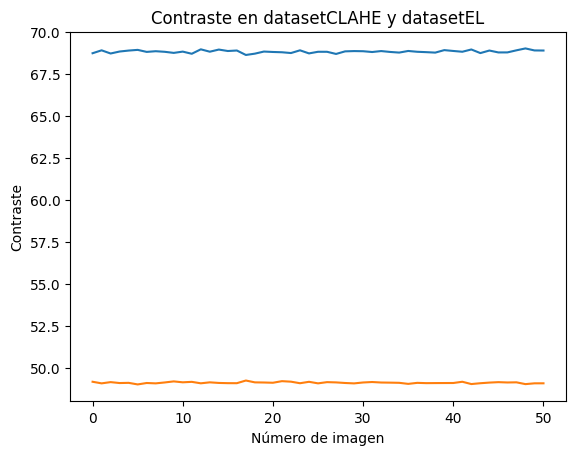

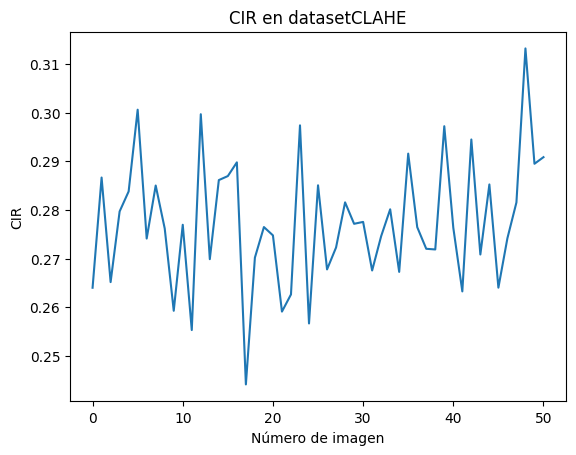

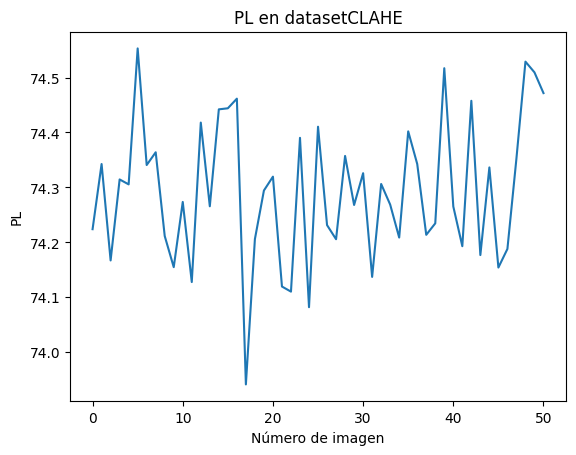

In [88]:
## Análisis y visualización de los resultados

plt.plot(contrast_valuesCLAHE, label="CLAHE")
plt.plot(contrast_valuesEL, label="Originales")
plt.title("Contraste en datasetCLAHE y datasetEL")
plt.xlabel("Número de imagen")
plt.ylabel("Contraste")
plt.show()

plt.plot(CIR_valuesCLAHE)
plt.title("CIR en datasetCLAHE")
plt.xlabel("Número de imagen")
plt.ylabel("CIR")
plt.show()

plt.plot(PL_valuesCLAHE)
plt.title("PL en datasetCLAHE")
plt.xlabel("Número de imagen")
plt.ylabel("PL")
plt.show()

In [89]:
## Aplicación del algoritmo HE
datasetHE = []
for image in datasetEL:
    datasetHE.append(HE(image))

## Creación de un dataset con las imágenes mejoradas, que se almacena en el directorio `salidas_path/datasetHE`
os.makedirs(os.path.join(salidas_path, "datasetHE"), exist_ok=True)
for i, image in enumerate(datasetHE):
    cv2.imwrite(os.path.join(salidas_path, "datasetHE", f"HE_{i}.jpg"), image)

    

In [90]:
## Cálculo de métricas en el datasetHE

contrast_valuesHE = []
for image in datasetHE:
    contrast_valuesHE.append(contrast_metric(image))
print("Contraste promedio en imágenes de datasetHE: ", np.mean(contrast_valuesHE))

PL_valuesHE = [] # Cálculo de la métrica PL, requiere comparar cada imagen de datasetEL con su correspondiente en datasetHE
for imageHE, imageEL in zip(datasetHE, datasetEL):
    PL_valuesHE.append(PL(imageEL, imageHE))
print("PL promedio en imágenes de datasetHE: ", np.mean(PL_valuesHE))

CIR_valuesHE = [] # Cálculo de la métrica CIR, requiere comparar cada imagen de datasetHE con su correspondiente en datasetEL
for i, (imageHE, imageEL) in enumerate(zip(datasetHE, datasetEL)):
    # Imprime el número de imagen que se está comparando cada múltiplo de 10
    if i % 10 == 0:
        print("Imagen: ", i)
    CIR_valuesHE.append(CIR(imageEL, imageHE))
print("CIR promedio en imágenes de datasetHE: ", np.mean(CIR_valuesHE))

## Anotación de los resultados en archivo SCV
df = pd.DataFrame({
    "Contraste EL": contrast_valuesEL,
    "Contraste HE": contrast_valuesHE,
    "CIR HE": CIR_valuesHE,
    "PL HE": PL_valuesHE
})
df.to_csv(salidas_path + "/metricsHE.csv", index=False)


Contraste promedio en imágenes de datasetHE:  78.02617952959763
PL promedio en imágenes de datasetHE:  74.99965051779488
Imagen:  0
Imagen:  1
Imagen:  2
Imagen:  3
Imagen:  4
Imagen:  5
Imagen:  6
Imagen:  7
Imagen:  8
Imagen:  9
Imagen:  10
Imagen:  11
Imagen:  12
Imagen:  13
Imagen:  14
Imagen:  15
Imagen:  16
Imagen:  17
Imagen:  18
Imagen:  19
Imagen:  20
Imagen:  21
Imagen:  22
Imagen:  23
Imagen:  24
Imagen:  25
Imagen:  26
Imagen:  27
Imagen:  28
Imagen:  29
Imagen:  30
Imagen:  31
Imagen:  32
Imagen:  33
Imagen:  34
Imagen:  35
Imagen:  36
Imagen:  37
Imagen:  38
Imagen:  39
Imagen:  40
Imagen:  41
Imagen:  42
Imagen:  43
Imagen:  44
Imagen:  45
Imagen:  46
Imagen:  47
Imagen:  48
Imagen:  49
Imagen:  50
CIR promedio en imágenes de datasetHE:  0.009221958070105772


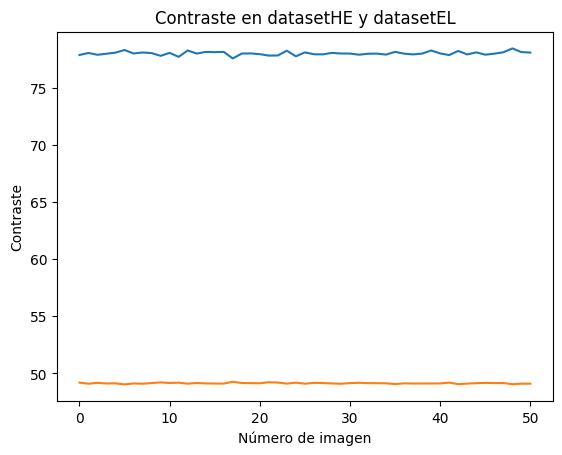

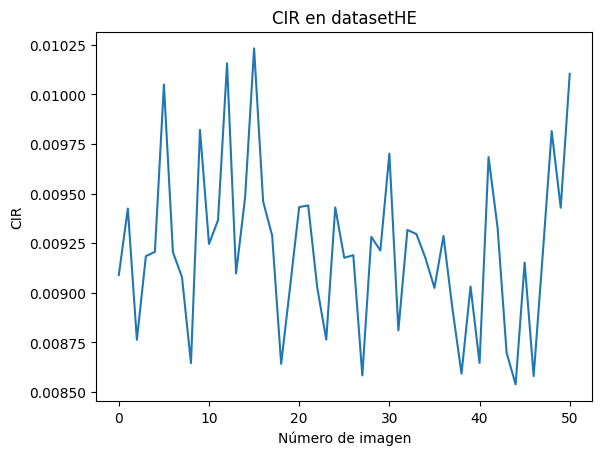

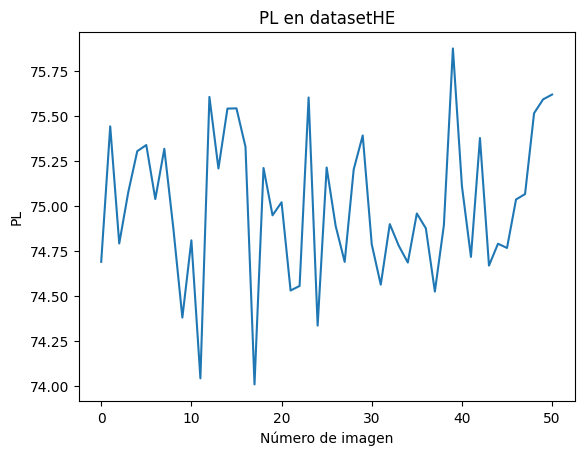

In [91]:
## Análisis y visualización de los resultados

plt.plot(contrast_valuesHE, label="HE")
plt.plot(contrast_valuesEL, label="Originales")
plt.title("Contraste en datasetHE y datasetEL")
plt.xlabel("Número de imagen")
plt.ylabel("Contraste")
plt.show()

plt.plot(CIR_valuesHE)
plt.title("CIR en datasetHE")
plt.xlabel("Número de imagen")
plt.ylabel("CIR")
plt.show()

plt.plot(PL_valuesHE)
plt.title("PL en datasetHE")
plt.xlabel("Número de imagen")
plt.ylabel("PL")
plt.show()

In [4]:
## Aplicación del algoritmo SubtractBG(imageEL, inageBG) para eliminar el fondo de las imágenes
datasetNoBG = []
for imageEL, imageBG in zip(datasetEL, datasetBG):
    datasetNoBG.append(SubtractBG(imageEL, imageBG))

## Creación de un dataset con las imágenes mejoradas, que se almacena en el directorio `salidas_path/datasetNoBG`
os.makedirs(os.path.join(salidas_path, "datasetNoBG"), exist_ok=True)
for i, image in enumerate(datasetNoBG):
    cv2.imwrite(os.path.join(salidas_path, "datasetNoBG", f"NoBG_{i}.jpg"), image)


In [5]:
## Cálculo de métricas en el datasetNoBG
contrast_valuesNoBG = []
for image in datasetNoBG:
    contrast_valuesNoBG.append(contrast_metric(image))
print("Contraste promedio en imágenes de datasetNoBG: ", np.mean(contrast_valuesNoBG))

PL_valuesNoBG = [] # Cálculo de la métrica PL, requiere comparar cada imagen de datasetEL con su correspondiente en datasetNoBG
for imageNoBG, imageEL in zip(datasetNoBG, datasetEL):
    PL_valuesNoBG.append(PL(imageEL, imageNoBG))
print("PL promedio en imágenes de datasetNoBG: ", np.mean(PL_valuesNoBG))

CIR_valuesNoBG = [] # Cálculo de la métrica CIR, requiere comparar cada imagen de datasetNoBG con su correspondiente en datasetEL
for imageNoBG, imageEL in zip(datasetNoBG, datasetEL):
    CIR_valuesNoBG.append(CIR(imageEL, imageNoBG))
print("CIR promedio en imágenes de datasetNoBG: ", np.mean(CIR_valuesNoBG))



Contraste promedio en imágenes de datasetNoBG:  48.790181539202464
PL promedio en imágenes de datasetNoBG:  100.86911740528902
CIR promedio en imágenes de datasetNoBG:  0.7231809285494009


NameError: name 'contrast_valuesEL' is not defined

In [7]:
contrast_valuesEL = [] # Cálculo de la métrica de contraste en datasetEL
for image in datasetEL:
    contrast_valuesEL.append(contrast_metric(image))
print("Contraste promedio en imágenes de datasetEL: ", np.mean(contrast_valuesEL))

## Anotación de los resultados en archivo SCV
df = pd.DataFrame({
    "Contraste EL": contrast_valuesEL,
    "Contraste NoBG": contrast_valuesNoBG,
    "CIR NoBG": CIR_valuesNoBG,
    "PL NoBG": PL_valuesNoBG
})
df.to_csv(salidas_path + "/metricsNoBG.csv", index=False)


Contraste promedio en imágenes de datasetEL:  49.1287973522965


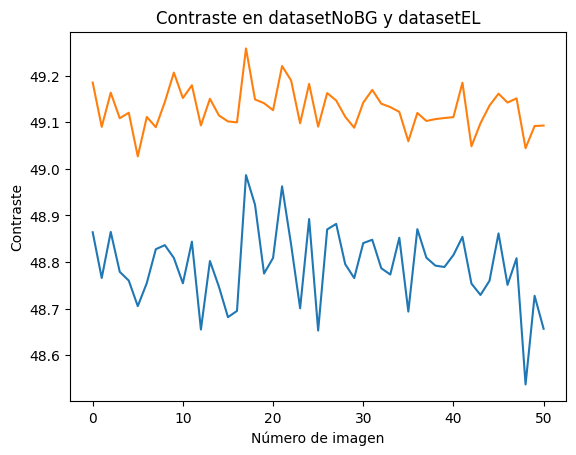

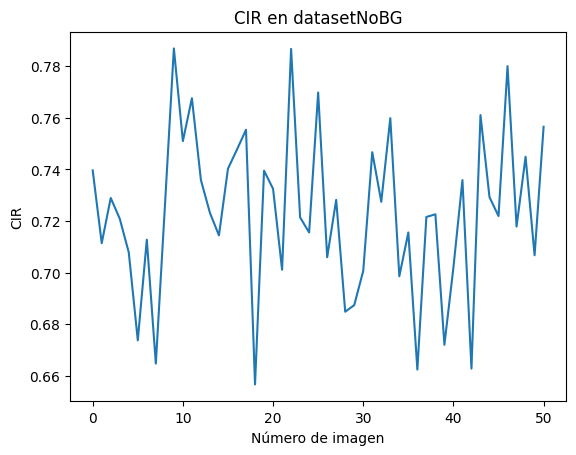

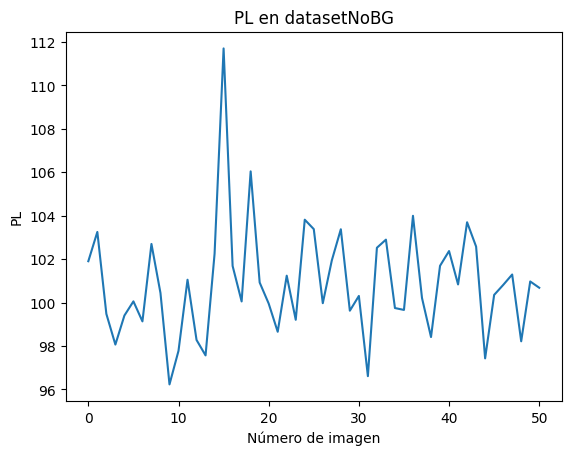

In [8]:
## Análisis y visualización de los resultados

plt.plot(contrast_valuesNoBG, label="NoBG")
plt.plot(contrast_valuesEL, label="Originales")
plt.title("Contraste en datasetNoBG y datasetEL")
plt.xlabel("Número de imagen")
plt.ylabel("Contraste")
plt.show()

plt.plot(CIR_valuesNoBG)
plt.title("CIR en datasetNoBG")
plt.xlabel("Número de imagen")
plt.ylabel("CIR")
plt.show()

plt.plot(PL_valuesNoBG)
plt.title("PL en datasetNoBG")
plt.xlabel("Número de imagen")
plt.ylabel("PL")
plt.show()

In [25]:
from ImagePreprocessing.contrast_enhancement import get_mean_max_min_image

ImportError: cannot import name 'get_mean_max_min_image' from 'ImagePreprocessing.contrast_enhancement' (d:\Documentos\Universidad de Cuenca\Trabajo de Titulación\PVDefectDetect\ImagePreprocessing\contrast_enhancement.py)

In [19]:

## Aplicación del algoritmo get_mean_max_min_image(dataset): para obtener la imagen promedio, la imagen con el máximo contraste y la imagen con el mínimo contraste
mean_image, max_contrast_image, min_contrast_image = get_mean_max_min_image(datasetEL)

## Creación de un dataset con las imágenes mejoradas, que se almacena en el directorio `salidas_path/datasetMeanMaxMin`
os.makedirs(os.path.join(salidas_path, "datasetMeanMaxMin"), exist_ok=True)
cv2.imwrite(os.path.join(salidas_path, "datasetMeanMaxMin", "MeanImage.jpg"), mean_image)
cv2.imwrite(os.path.join(salidas_path, "datasetMeanMaxMin", "MaxContrastImage.jpg"), max_contrast_image)
cv2.imwrite(os.path.join(salidas_path, "datasetMeanMaxMin", "MinContrastImage.jpg"), min_contrast_image)



NameError: name 'get_mean_max_min_image' is not defined

In [ ]:
## Cálculo de métricas en el datasetMeanMaxMin
contrast_valuesMeanMaxMin = []
for image in [mean_image, max_contrast_image, min_contrast_image]:
    contrast_valuesMeanMaxMin.append(contrast_metric(image))
print("Contraste promedio en imágenes de datasetMeanMaxMin: ", np.mean(contrast_valuesMeanMaxMin))

PL_valuesMeanMaxMin = [] # Cálculo de la métrica PL, requiere comparar cada imagen de datasetEL con su correspondiente en datasetMeanMaxMin
for imageMeanMaxMin, imageEL in zip([mean_image, max_contrast_image, min_contrast_image], datasetEL):
    PL_valuesMeanMaxMin.append(PL(imageEL, imageMeanMaxMin))
print("PL promedio en imágenes de datasetMeanMaxMin: ", np.mean(PL_valuesMeanMaxMin))

CIR_valuesMeanMaxMin = [] # Cálculo de la métrica CIR, requiere comparar cada imagen de datasetMeanMaxMin con su correspondiente en datasetEL
for imageMeanMaxMin, imageEL in zip([mean_image, max_contrast_image, min_contrast_image], datasetEL):
    CIR_valuesMeanMaxMin.append(CIR(imageEL, imageMeanMaxMin))
print("CIR promedio en imágenes de datasetMeanMaxMin: ", np.mean(CIR_valuesMeanMaxMin))

## Anotación de los resultados en archivo SCV
df = pd.DataFrame({
    "Contraste EL": contrast_valuesEL,
    "Contraste MeanMaxMin": contrast_valuesMeanMaxMin,
    "CIR MeanMaxMin": CIR_valuesMeanMaxMin,
    "PL MeanMaxMin": PL_valuesMeanMaxMin
})
df.to_csv(salidas_path + "/metricsMeanMaxMin.csv", index=False)
